# Experiment 2.2
- 2.2 Understand supervised learning to train and develop classifier models.


## PyCaret for Classification
- It is a bundle of many Machine Learning algorithms.
- Only three lines of code is required to compare 20 ML models.
- Pycaret is available for:
    - Classification
    - Regression
    - Clustering

In [2]:
import pycaret 
pycaret.__version__

'3.4.0'

## Injesting the required Dataset

In [13]:
from pycaret.datasets import get_data
diabetesDataSet = get_data('diabetes')  # Loads the "diabetes" dataset, which is a binary classification problem
                                        # The target column, "Class variable," has two classes (binary values)

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Set up the Classification Environment

In [6]:
from pycaret.classification import * # To perform classification tasks using Pycaret

In [9]:
s = setup(data=diabetesDataSet,target= 'Class variable')
# Initializes the Pycaret Classification Environment
# Specifies the data set and the target column to be used for training

,Description,Value
0,Session id,305
1,Target,Class variable
2,Target type,Binary
3,Original data shape,"(768, 9)"
4,Transformed data shape,"(768, 9)"
5,Transformed train set shape,"(537, 9)"
6,Transformed test set shape,"(231, 9)"
7,Numeric features,8
8,Preprocess,True
9,Imputation type,simple


## Create a Random Forest (Classification Training) Model

In [11]:
# Train a random forest classifier model using the default hyperparameters
rfModel = create_model('rf') 
# Try different models 'lr','et','dt','nb','ada'

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,17:36:04
Status,. . . . . . . . . . . . . . . . . .,Loading Dependencies
Estimator,. . . . . . . . . . . . . . . . . .,Compiling Library


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6852,0.7429,0.3684,0.5833,0.4516,0.2463,0.2591
1,0.6852,0.7579,0.5263,0.5556,0.5405,0.3014,0.3016
2,0.7407,0.8075,0.6316,0.6316,0.6316,0.4316,0.4316
3,0.7778,0.8053,0.7895,0.6522,0.7143,0.5352,0.5417
4,0.7778,0.8188,0.5263,0.7692,0.6250,0.4749,0.4921
5,0.8519,0.9120,0.7368,0.8235,0.7778,0.6672,0.6695
6,0.7963,0.8474,0.6842,0.7222,0.7027,0.5479,0.5484
7,0.7736,0.8325,0.5556,0.7143,0.6250,0.4664,0.4740
8,0.7547,0.8262,0.5000,0.6923,0.5806,0.4136,0.4246


### Confusion Matrix

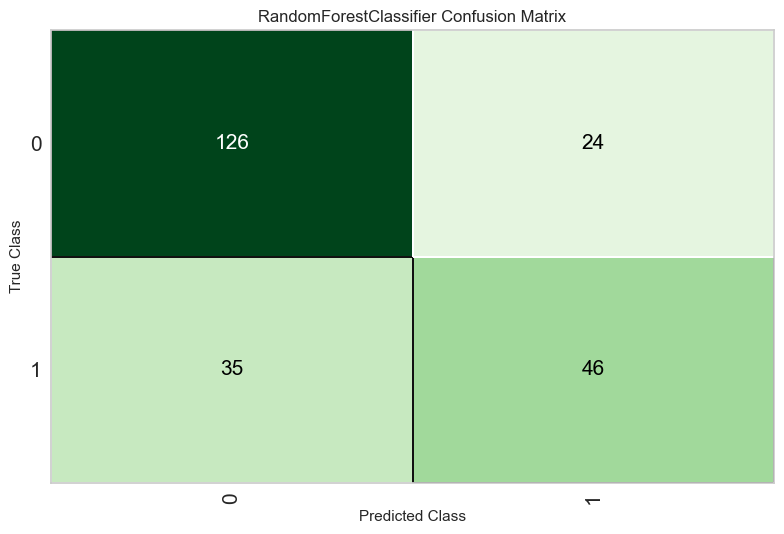

In [17]:
# Visualize the confusion matrix for the Random Forest model to evaluate its performance
plot_model(rfModel,plot='confusion_matrix')

### ROC Curves

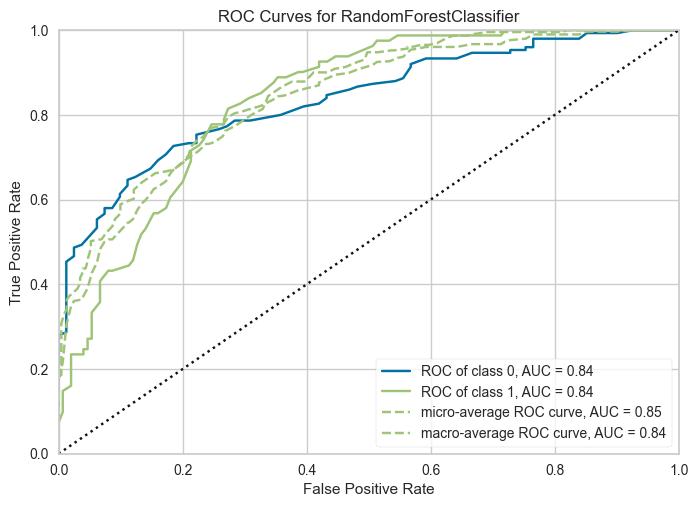

In [19]:
# Generate standard evaluation plots like ROC curve, Precision-recall curves, etc.
plot_model(rfModel)

### Feature Importance

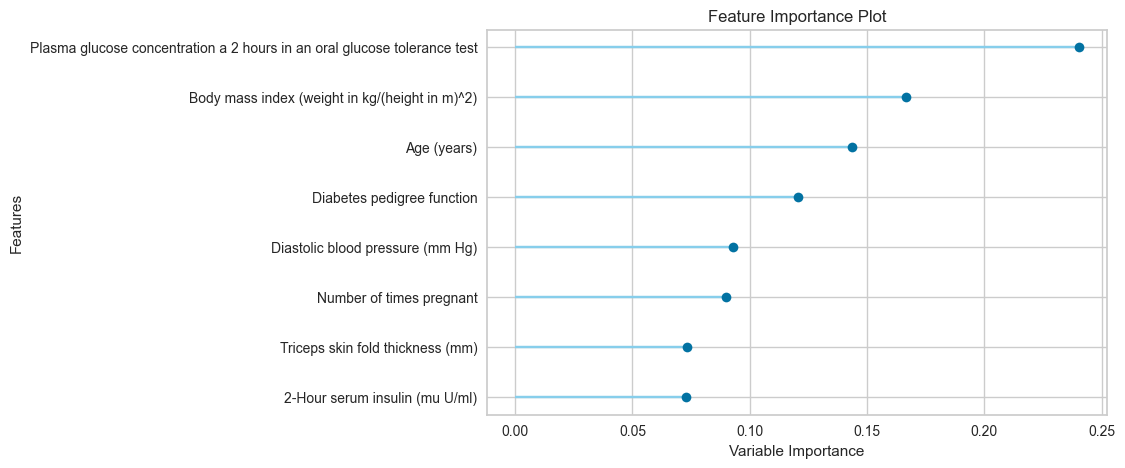

In [21]:
# visualize the importance of features in making predictions with the Random Forest model
plot_model(rfModel,plot='feature')

In [24]:
# Load a fresh copy of the diabetes dataset and selects few rows for testing
newDataSet = get_data('diabetes').iloc[157:168,:]

# Use the trained Random Forest model to predict the class labels for the new data
newPredictions = predict_model(rfModel,newDataSet)

# Output the predictions, including the class labels and probabilities for the new dataset
newPredictions

,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


,Number of times pregnant,Plasma glucose concentration a 2 hours in an oral glucose tolerance test,Diastolic blood pressure (mm Hg),Triceps skin fold thickness (mm),2-Hour serum insulin (mu U/ml),Body mass index (weight in kg/(height in m)^2),Diabetes pedigree function,Age (years),Class variable,prediction_label,prediction_score
157,1,109,56,21,135,25.200001,0.833,23,0,0,0.99
158,2,88,74,19,53,29.000000,0.229,22,0,0,0.99
159,17,163,72,41,114,40.900002,0.817,47,1,1,0.73
160,4,151,90,38,0,29.700001,0.294,36,0,0,0.69
161,7,102,74,40,105,37.200001,0.204,45,0,0,0.63
162,0,114,80,34,285,44.200001,0.167,27,0,0,0.86
163,2,100,64,23,0,29.700001,0.368,21,0,0,0.96
164,0,131,88,0,0,31.600000,0.743,32,1,1,0.56
165,6,104,74,18,156,29.900000,0.722,41,1,1,0.82
166,3,148,66,25,0,32.500000,0.256,22,0,0,0.83


## Workflow

1. Load Data
- from pycaret.datasets import get_data
- diabetesDataSet = get_data("diabetes")

What happens:
- Loads a built-in dataset from PyCaret (here, “diabetes”).
- This is your raw data: features like glucose, BMI, age, and the target column (Class variable) which says if someone has diabetes (1) or not (0).

2. Set up the Experiment
- from pycaret.classification import *
- s = setup(data=diabetesDataSet, target='Class variable')

What happens:
- PyCaret automatically prepares your data for machine learning.
- Steps done automatically:
    - Handle missing values.
    - Encode categorical variables.
    - Normalize or scale numeric features if needed.
    - Split data into training and test (holdout) sets.
    - target='Class variable' tells PyCaret which column to predict.

Why it’s important:
- Sets the “environment” for all future modeling. Everything PyCaret does after this step depends on this setup.

3. Create a Model
- rfModel = create_model('rf')  # Random Forest

What happens:
- Trains a Random Forest classifier on the training data.
- Default hyperparameters are used unless you tweak them.

Other options:
'lr' → Logistic Regression
'ada' → AdaBoost
'dt' → Decision Tree
You can compare multiple models quickly.

4. Evaluate the Model
- plot_model(rfModel, plot='confusion_matrix')
- plot_model(rfModel)  # Other evaluation plots like ROC curve
- plot_model(rfModel, plot='feature')


What happens:
- confusion_matrix → Shows how many predictions were correct/incorrect.
- ROC / Precision-Recall curves → Evaluate classifier performance visually.
- feature → Shows which input features are most important in the model.

Why it’s important:
Helps you understand your model’s strengths and weaknesses.
Feature importance can guide data cleaning or feature selection.

5. Make Predictions on New Data
- newDataSet = get_data("diabetes").iloc[157:168,:]
- newPredictions = predict_model(rfModel, data=newDataSet)

What happens:
- Takes new rows (or a separate test dataset) and applies the trained model.

Returns:
- prediction_label → 0 or 1
- prediction_score → probability of being in class 1

Why it’s important:
You don’t just want a trained model — you want predictions on unseen data.

6. Compare Multiple Models (Optional but Powerful)
- compare_models()

What happens:
- Trains multiple algorithms automatically and compares them using metrics like Accuracy, Recall, Precision, F1-score.
- Lets you pick the best-performing model without writing extra code.

7. Tune Hyperparameters (Optional)
- tunedModel = tune_model(rfModel)

What happens:
- Finds the best hyperparameters (like number of trees in Random Forest) to maximize performance.

8. Finalize the Model
- finalModel = finalize_model(rfModel)

What happens:
- Locks in the model so you can deploy it for real-world predictions.
- Combines training and holdout datasets to train the model on all available data.

## TL;DR / Big Picture

- Load Data → get the dataset.
- Setup → prepare the environment & split data.
- Create Model → train your classifier.
- Evaluate → see performance via plots & metrics.
- Predict → generate predictions on new/unseen data.
- Compare/Tune/Finalize → optional steps to improve and deploy.